In [122]:
import pandas as pd
import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import train_test_split 
from sklearn import linear_model, preprocessing 

In [123]:
#pd.set_option('max_columns', None)

In [124]:
main_df = pd.read_csv('MLB_Hitting_22_ReadyforEDA.csv')

In [125]:
main_df.head()

,Unnamed: 0,Date,Name,Team,FD_Pts,DK_Pts,Events,AVG,wOBA,OPS,ISO,BABIP,GB/FB,OpenOU,Opp_Hand,Opp_Team,Proj_Runs,Park,OPSvs_Hand,ISOvs_Hand,BABIPvs_Hand,wOBAvs_Hand,GB/FBvs_Hand,BABIP_BP,AVG_BP,EV_BP,LA_BP,Barrels_BP,maxEV_BP,HardHit_BP,Events_BP,Temp,Wind,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,BB%,K%,LD%,HR/FB,Soft%,Med%,Hard%,BB%vs_Hand,K%vs_Hand,LD%vs_Hand,HR/FBvs_Hand,Soft%vs_Hand,Med%vs_Hand,Hard%vs_Hand,GB%,LD%_BP,FB%,HR/FB_BP,Soft%_BP,Med%_BP,Hard%_BP,Barrel%_BP,HardHit%_BP,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO
0,0,2022-08-07,Cody Bellinger,LAD,40.4,31,65.0,0.179,0.251,0.572,0.155,0.206,0.93,9.0,R,SDP,4.725,LAD,0.682,0.198,0.250,0.297,0.71,0.342,0.276,89.0,13.3,12,115.1,101,267,92.0,4.0,88.5,105.5,16.1,3,4.6,23,35.4,6.5,21.7,10.8,6.7,13.8,50.8,35.4,8.2,28.5,15.0,13.3,13.2,52.7,34.1,40.4,24.2,35.5,7.4,15.7,53.6,30.7,4.5,37.8,101,125,105
1,1,2022-08-07,Max Muncy,LAD,9.0,8,47.0,0.176,0.284,0.640,0.176,0.227,0.42,9.0,R,SDP,4.725,LAD,0.669,0.156,0.228,0.305,0.47,0.342,0.276,89.0,13.3,12,115.1,101,267,92.0,4.0,93.1,107.9,24.9,10,21.3,25,53.2,13.3,33.3,21.3,11.5,14.9,31.9,53.2,18.3,26.7,16.2,8.6,14.0,46.2,39.9,40.4,24.2,35.5,7.4,15.7,53.6,30.7,4.5,37.8,101,125,105
2,2,2022-08-07,Mookie Betts,LAD,12.2,10,96.0,0.274,0.365,0.859,0.257,0.270,0.95,9.0,R,SDP,4.725,LAD,0.823,0.247,0.246,0.354,0.85,0.342,0.276,89.0,13.3,12,115.1,101,267,92.0,4.0,90.7,107.7,16.3,11,11.5,41,42.7,6.4,15.2,18.8,17.5,9.4,47.9,42.7,8.7,16.4,16.8,17.2,12.3,49.5,38.2,40.4,24.2,35.5,7.4,15.7,53.6,30.7,4.5,37.8,101,125,105
3,3,2022-08-07,Freddie Freeman,LAD,13.0,10,94.0,0.392,0.464,1.116,0.268,0.371,1.39,9.0,R,SDP,4.725,LAD,0.962,0.216,0.350,0.407,1.06,0.342,0.276,89.0,13.3,12,115.1,101,267,92.0,4.0,91.5,110.2,12.4,9,9.6,43,45.7,10.5,5.3,28.7,17.9,11.7,48.9,39.4,11.7,11.4,28.0,12.4,9.1,52.8,38.2,40.4,24.2,35.5,7.4,15.7,53.6,30.7,4.5,37.8,101,125,105
4,4,2022-08-07,Trea Turner,LAD,12.2,10,98.0,0.306,0.368,0.872,0.252,0.300,0.95,9.0,R,SDP,4.725,LAD,0.795,0.159,0.347,0.343,1.35,0.342,0.276,89.0,13.3,12,115.1,101,267,92.0,4.0,88.9,111.2,16.4,10,10.2,37,37.8,1.7,13.8,19.6,17.5,8.2,54.6,37.1,5.5,18.6,23.1,10.6,14.6,53.5,31.9,40.4,24.2,35.5,7.4,15.7,53.6,30.7,4.5,37.8,101,125,105


In [126]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9103 entries, 0 to 9102
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9103 non-null   int64  
 1   Date            9103 non-null   object 
 2   Name            9103 non-null   object 
 3   Team            9103 non-null   object 
 4   FD_Pts          9103 non-null   float64
 5   DK_Pts          9103 non-null   int64  
 6   Events          9103 non-null   float64
 7   AVG             9103 non-null   float64
 8   wOBA            9103 non-null   float64
 9   OPS             9103 non-null   float64
 10  ISO             9103 non-null   float64
 11  BABIP           9103 non-null   float64
 12  GB/FB           9103 non-null   float64
 13  OpenOU          9103 non-null   float64
 14  Opp_Hand        9103 non-null   object 
 15  Opp_Team        9103 non-null   object 
 16  Proj_Runs       9103 non-null   float64
 17  Park            9103 non-null   o

In [127]:
main_df.drop(columns = 'Unnamed: 0', inplace = True)

In [128]:
main_df[main_df['Name'] == 'Amed Rosario']

,Date,Name,Team,FD_Pts,DK_Pts,Events,AVG,wOBA,OPS,ISO,BABIP,GB/FB,OpenOU,Opp_Hand,Opp_Team,Proj_Runs,Park,OPSvs_Hand,ISOvs_Hand,BABIPvs_Hand,wOBAvs_Hand,GB/FBvs_Hand,BABIP_BP,AVG_BP,EV_BP,LA_BP,Barrels_BP,maxEV_BP,HardHit_BP,Events_BP,Temp,Wind,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,BB%,K%,LD%,HR/FB,Soft%,Med%,Hard%,BB%vs_Hand,K%vs_Hand,LD%vs_Hand,HR/FBvs_Hand,Soft%vs_Hand,Med%vs_Hand,Hard%vs_Hand,GB%,LD%_BP,FB%,HR/FB_BP,Soft%_BP,Med%_BP,Hard%_BP,Barrel%_BP,HardHit%_BP,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO
45,2022-08-07,Amed Rosario,CLE,0.0,0,96.0,0.325,0.367,0.851,0.179,0.370,1.65,8.0,R,HOU,3.600000,CLE,0.704,0.100,0.336,0.308,1.99,0.260,0.190,85.9,15.7,7,111.0,61,183,86.0,3.0,90.7,109.5,6.2,6,6.3,44,45.8,2.5,17.4,28.1,15.4,10.4,63.5,26.0,3.6,15.8,22.0,4.3,15.3,61.6,23.1,43.2,14.2,42.6,7.7,23.0,53.0,24.0,3.8,33.3,100,98,102
392,2022-08-06,Amed Rosario,CLE,13.2,9,95.0,0.316,0.360,0.835,0.179,0.363,1.65,8.5,R,HOU,3.931250,CLE,0.706,0.101,0.337,0.309,2.03,0.273,0.200,86.4,15.5,7,111.0,65,189,82.0,3.0,90.9,109.5,6.1,6,6.3,43,45.3,2.5,18.2,27.4,15.4,11.6,63.2,25.3,3.6,16.0,22.0,4.4,15.5,61.7,22.7,42.9,15.9,41.3,7.7,21.7,52.4,25.9,3.7,34.4,100,98,102
592,2022-08-05,Amed Rosario,CLE,18.7,14,96.0,0.310,0.343,0.796,0.155,0.355,1.80,8.5,L,HOU,3.346875,CLE,0.816,0.183,0.308,0.352,1.68,0.270,0.200,86.6,15.4,8,111.0,64,191,81.0,4.0,90.7,109.5,5.2,5,5.2,41,42.7,2.5,17.4,27.1,12.0,10.4,65.6,24.0,7.8,12.7,17.3,12.0,16.0,51.9,32.1,42.9,15.2,41.9,7.5,20.4,52.4,27.2,4.2,33.5,100,98,102
778,2022-08-04,Amed Rosario,CLE,0.0,0,99.0,0.303,0.338,0.782,0.151,0.344,1.70,7.5,R,HOU,2.882812,CLE,0.720,0.103,0.342,0.314,2.11,0.269,0.201,86.3,14.3,8,111.0,64,193,80.0,4.0,89.9,109.5,6.1,4,4.0,41,41.4,3.2,16.8,26.3,11.1,12.1,66.7,21.2,3.7,15.7,22.3,4.6,15.4,61.9,22.7,44.6,16.1,39.4,9.2,19.2,56.0,24.9,4.1,33.2,100,98,102
869,2022-08-03,Amed Rosario,CLE,34.9,25,98.0,0.299,0.329,0.755,0.120,0.344,1.77,8.5,L,ARI,5.445312,CLE,0.764,0.146,0.303,0.332,1.71,0.273,0.216,87.9,16.0,16,110.0,80,226,88.0,5.0,90.0,109.5,5.6,4,4.1,40,40.8,4.8,16.0,26.5,7.7,12.2,67.3,20.4,8.2,12.2,16.7,8.3,16.7,52.6,30.8,34.8,24.4,40.7,6.7,14.6,52.2,33.2,7.1,35.4,100,98,102
1166,2022-08-02,Amed Rosario,CLE,0.0,0,101.0,0.308,0.347,0.799,0.142,0.347,1.55,7.5,R,ARI,3.937500,CLE,0.727,0.104,0.345,0.317,2.13,0.287,0.232,87.7,16.3,15,110.8,82,236,76.0,3.0,89.9,109.5,6.5,5,5.0,41,40.6,5.4,15.5,26.7,10.3,13.9,64.4,21.8,3.7,15.5,22.5,4.7,15.5,61.6,22.9,34.2,26.0,39.8,6.5,15.3,50.0,34.7,6.4,34.7,100,98,102
1330,2022-08-01,Amed Rosario,CLE,31.7,24,96.0,0.298,0.333,0.763,0.123,0.340,1.59,8.5,R,ARI,4.621875,CLE,0.711,0.096,0.343,0.311,2.16,0.281,0.232,87.7,16.7,15,110.8,77,217,80.0,3.0,89.7,109.5,6.4,4,4.2,39,40.6,5.7,15.4,27.1,7.4,14.6,63.5,21.9,3.8,15.5,22.5,3.2,15.8,61.3,22.9,34.1,24.8,41.1,8.0,15.2,50.7,34.1,6.9,35.5,100,98,102
1522,2022-07-30,Amed Rosario,CLE,3.0,3,96.0,0.319,0.359,0.826,0.142,0.362,1.50,7.5,R,TBR,3.609375,TBR,0.717,0.098,0.343,0.313,2.13,0.305,0.262,88.4,14.3,29,110.6,129,348,72.0,3.0,89.7,109.5,7.3,4,4.2,40,41.7,6.5,14.6,27.1,7.1,15.6,61.5,22.9,3.9,15.1,22.4,3.2,16.0,61.2,22.8,43.6,18.3,38.1,13.0,15.5,53.4,31.0,8.3,37.1,95,88,108
1785,2022-07-29,Amed Rosario,CLE,6.0,5,99.0,0.333,0.366,0.843,0.137,0.381,1.61,6.5,L,TBR,3.209375,TBR,0.798,0.163,0.309,0.346,1.64,0.312,0.271,88.1,14.5,30,110.6,129,349,72.0,3.0,89.1,109.5,6.3,4,4.0,39,39.4,5.6,15.1,26.3,7.1,16.2,61.6,22.2,9.0,12.4,17.1,9.1,15.7,50.0,34.3,42.9,18.6,38.6,14.3,15.8,53.9,30.4,8.6,37.0,95,88,108
2061,2022-07-28,Amed Rosario,CLE,0.0,0,99.0,0.345,0.376,0.867,0.138,0.392,1.67,9.0,R,BOS,4.556250,BOS,0.726,0.100,0.348,0.317,2.13,0.331,0.259,87.4,9.0,20,112.0,125,327,79.0,5.0,89.0,109.5,6.1,4,4.0,41,41.4,5.6,14.4,27.3,7.4,19.2,58.6,22.2,3.6,15.1,22.4,3.3,17.1,60.6,22.4,47.2,20.8,32.0,12.6,21.4,49.8,28.7,6.1,38.2,109,101,94


In [129]:
main_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FD_Pts,9103.0,9.080589,9.290467,0.00000,3.000000,6.200000,12.600,66.6000
DK_Pts,9103.0,6.944743,6.890687,0.00000,2.000000,5.000000,10.000,49.0000
Events,9103.0,56.784027,23.229997,1.00000,41.000000,60.000000,75.000,112.0000
AVG,9103.0,0.250331,0.065544,0.00000,0.213000,0.250000,0.289,0.8330
wOBA,9103.0,0.319934,0.075646,0.00000,0.275000,0.320000,0.365,1.3810
OPS,9103.0,0.732699,0.189357,0.00000,0.621000,0.732000,0.843,3.3330
ISO,9103.0,0.165042,0.096823,0.00000,0.101000,0.160000,0.220,2.0000
BABIP,9103.0,0.296023,0.086002,0.00000,0.250000,0.296000,0.342,1.0000
GB/FB,9103.0,1.304818,0.835838,0.00000,0.830000,1.140000,1.550,21.0000
OpenOU,9103.0,8.403768,0.921925,6.50000,8.000000,8.500000,9.000,12.0000


In [130]:
main_df.sort_values(by = 'OPS', ascending = False)

,Date,Name,Team,FD_Pts,DK_Pts,Events,AVG,wOBA,OPS,ISO,BABIP,GB/FB,OpenOU,Opp_Hand,Opp_Team,Proj_Runs,Park,OPSvs_Hand,ISOvs_Hand,BABIPvs_Hand,wOBAvs_Hand,GB/FBvs_Hand,BABIP_BP,AVG_BP,EV_BP,LA_BP,Barrels_BP,maxEV_BP,HardHit_BP,Events_BP,Temp,Wind,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,BB%,K%,LD%,HR/FB,Soft%,Med%,Hard%,BB%vs_Hand,K%vs_Hand,LD%vs_Hand,HR/FBvs_Hand,Soft%vs_Hand,Med%vs_Hand,Hard%vs_Hand,GB%,LD%_BP,FB%,HR/FB_BP,Soft%_BP,Med%_BP,Hard%_BP,Barrel%_BP,HardHit%_BP,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO
8503,2022-06-25,Edward Olivares,KCR,0.0,0,3.0,0.667,1.381,3.333,2.000,0.0,0.5,9.5,L,OAK,5.106250,KCR,1.596,0.600,0.455,0.654,0.60,0.323,0.274,88.4,10.7,22,111.0,100,277,93.0,3.0,103.3,108.0,15.7,2,66.7,3,100.0,0.0,0.0,0.0,100.0,0.0,0.0,100.0,5.9,11.8,38.5,40.0,15.4,30.8,53.8,44.9,16.2,39.0,13.2,17.3,49.8,32.9,7.9,36.1,102,79,90
4817,2022-07-12,Jake Marisnick,PIT,18.7,14,2.0,0.667,1.004,2.750,1.333,1.0,0.0,8.5,L,MIA,3.825000,MIA,0.286,0.074,0.095,0.135,0.60,0.287,0.235,88.5,12.4,17,110.4,105,263,72.0,3.0,102.9,107.4,28.2,1,50.0,2,100.0,25.0,25.0,0.0,50.0,0.0,0.0,100.0,6.9,20.7,11.1,0.0,28.6,57.1,14.3,41.2,20.8,38.1,12.1,16.3,53.2,30.4,6.5,39.9,98,86,103
1016,2022-08-03,James Outman,LAD,6.2,5,5.0,0.833,0.971,2.542,0.833,1.0,0.5,7.5,R,SFG,4.195312,SFG,2.524,0.833,1.000,1.011,0.50,0.352,0.284,87.7,10.9,22,109.6,105,295,61.0,5.0,98.4,109.5,18.4,0,0.0,4,80.0,12.5,12.5,40.0,50.0,0.0,20.0,80.0,0.0,14.3,40.0,50.0,0.0,20.0,80.0,45.0,20.6,34.4,8.0,19.7,55.9,24.4,7.5,35.6,100,82,101
1286,2022-08-01,James Outman,LAD,21.4,16,3.0,0.750,1.052,2.500,1.000,1.0,0.0,7.5,R,SFG,3.937500,SFG,2.500,1.000,1.000,1.052,0.00,0.348,0.281,88.1,10.4,21,109.6,105,294,65.0,4.0,103.6,109.5,18.4,0,0.0,3,100.0,0.0,25.0,66.7,100.0,0.0,0.0,100.0,0.0,25.0,66.7,100.0,0.0,0.0,100.0,45.9,20.7,33.4,7.2,19.4,56.1,24.5,7.1,35.7,100,82,101
4642,2022-07-13,Jake Marisnick,PIT,6.0,6,4.0,0.500,0.869,2.238,1.167,0.5,0.0,7.0,R,MIA,2.843750,MIA,0.795,0.154,0.438,0.345,1.60,0.285,0.235,88.0,12.2,16,110.4,103,265,72.0,3.0,101.8,107.4,33.3,2,50.0,3,75.0,14.3,28.6,0.0,50.0,0.0,25.0,75.0,3.6,32.1,23.5,20.0,27.8,33.3,38.9,41.6,19.8,38.5,11.9,16.6,54.3,29.1,6.0,38.9,98,86,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,2022-08-02,Seth Beer,ARI,0.0,0,3.0,0.000,0.000,0.000,0.000,0.0,2.0,7.5,R,CLE,3.562500,CLE,0.528,0.061,0.239,0.243,1.47,0.291,0.229,89.4,9.9,19,111.6,114,269,76.0,3.0,68.3,83.3,-14.9,0,0.0,0,0.0,0.0,25.0,33.3,0.0,66.7,0.0,33.3,9.1,26.0,21.3,6.7,17.0,48.9,34.0,49.1,15.4,35.6,8.4,15.2,54.3,30.5,7.1,42.4,100,98,102
1184,2022-08-02,Mark Contreras,MIN,18.7,14,2.0,0.000,0.000,0.000,0.000,0.0,0.0,9.0,R,DET,5.540625,MIN,0.191,0.000,0.143,0.080,1.00,0.296,0.240,88.3,11.6,14,113.3,127,337,94.0,3.0,97.1,98.0,38.4,1,50.0,2,100.0,0.0,50.0,0.0,0.0,0.0,50.0,50.0,0.0,36.4,14.3,0.0,14.3,57.1,28.6,45.0,19.3,35.6,5.1,15.4,58.5,26.1,4.2,37.7,97,94,100
7716,2022-06-29,Stephen Piscotty,OAK,19.2,14,2.0,0.000,0.000,0.000,0.000,0.0,1.0,8.5,R,NYY,2.603125,NYY,0.538,0.111,0.222,0.242,5.50,0.205,0.162,85.3,8.3,11,112.8,68,234,83.0,4.0,78.4,93.7,20.2,0,0.0,0,0.0,0.0,33.3,0.0,0.0,50.0,50.0,0.0,3.4,27.6,31.6,50.0,5.3,68.4,26.3,52.2,13.4,34.5,6.3,23.3,55.2,21.6,4.7,29.1,99,113,104
438,2022-08-05,Jean Segura,PHI,0.0,0,1.0,0.000,0.000,0.000,0.000,0.0,1.0,8.5,R,WSN,5.365625,PHI,0.739,0.118,0.316,0.327,2.07,0.257,0.216,88.4,15.3,19,115.2,96,288,87.0,4.0,100.2,100.2,-16.9,0,0.0,1,100.0,0.0,50.0,0.0,0.0,0.0,100.0,0.0,5.5,15.6,16.2,14.8,26.3,44.4,29.3,41.3,16.1,42.7,9.8,14.6,59.0,26.4,6.6,33.3,102,114,104


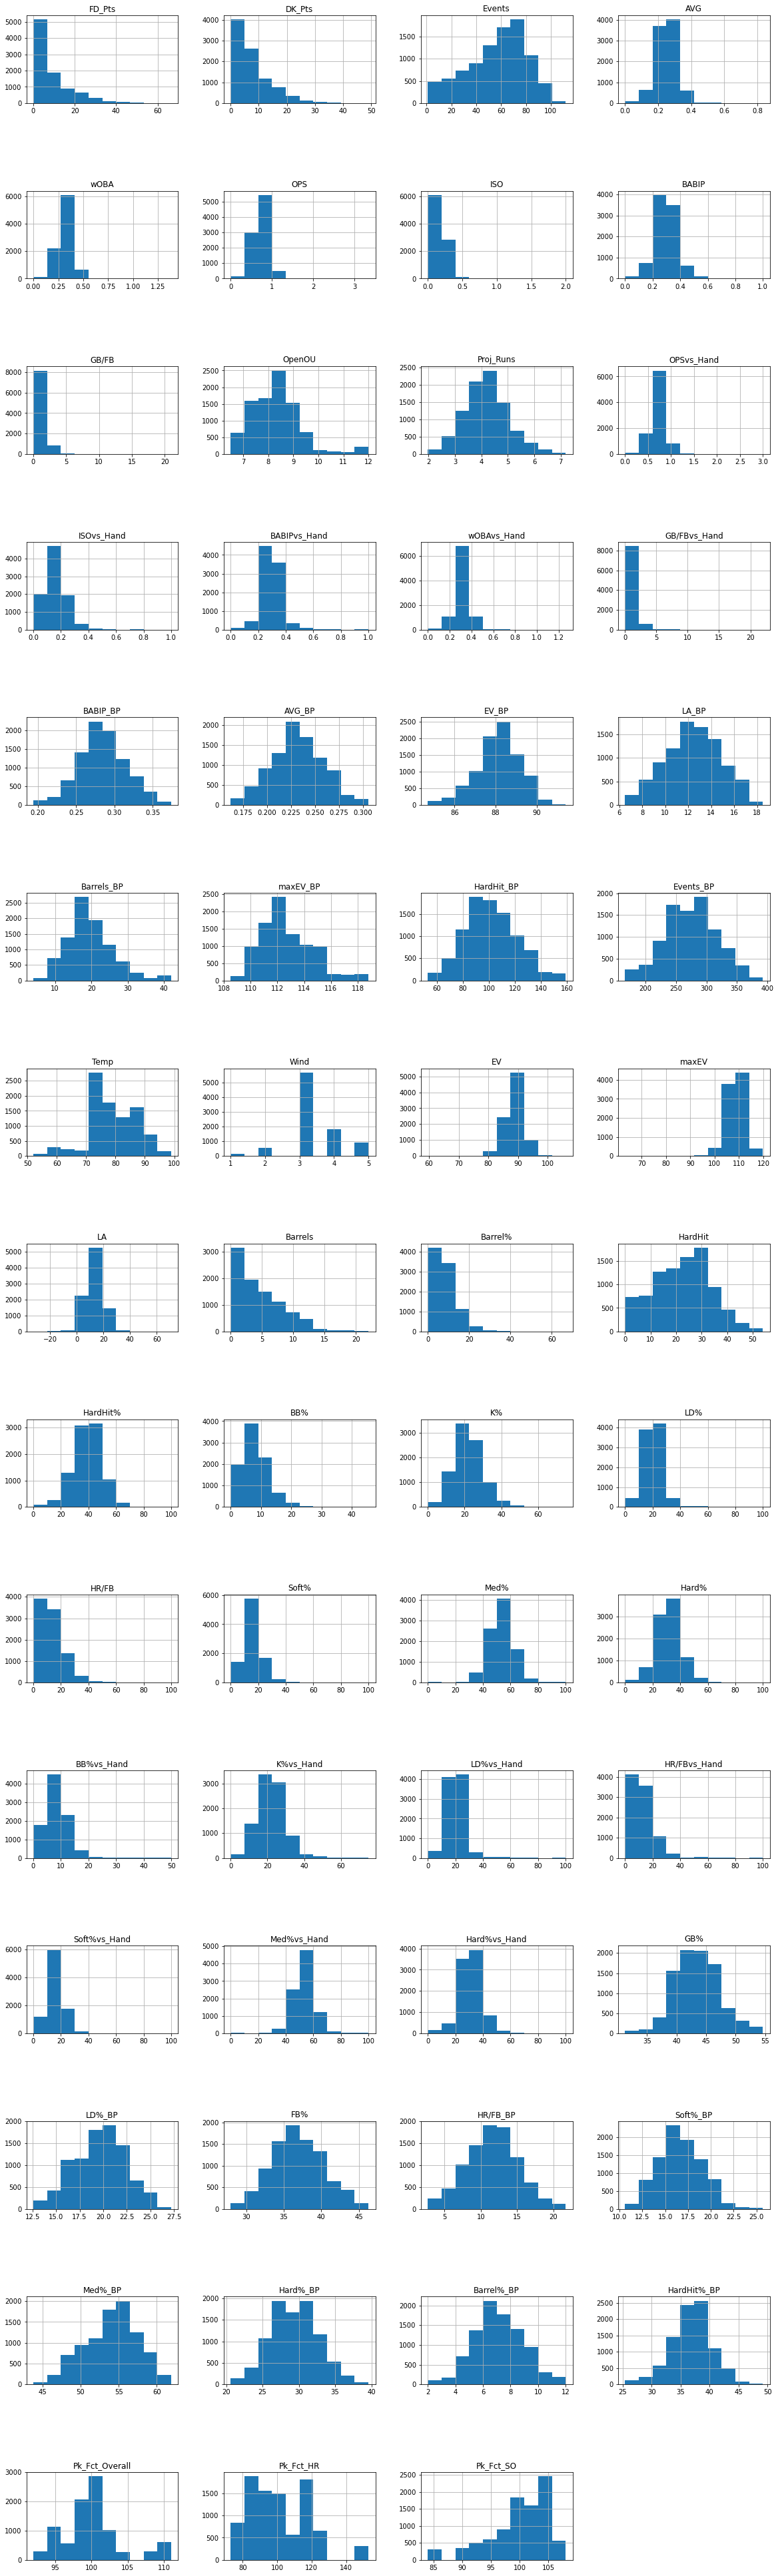

In [131]:
main_df.hist(layout = (17, 4), figsize = (20, 80))
plt.subplots_adjust(hspace=1)
plt.show();

In [132]:
main_df_fenway = main_df[main_df['Park'] == 'BOS']

In [133]:
main_df_fenway.describe()

,FD_Pts,DK_Pts,Events,AVG,wOBA,OPS,ISO,BABIP,GB/FB,OpenOU,Proj_Runs,OPSvs_Hand,ISOvs_Hand,BABIPvs_Hand,wOBAvs_Hand,GB/FBvs_Hand,BABIP_BP,AVG_BP,EV_BP,LA_BP,Barrels_BP,maxEV_BP,HardHit_BP,Events_BP,Temp,Wind,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,BB%,K%,LD%,HR/FB,Soft%,Med%,Hard%,BB%vs_Hand,K%vs_Hand,LD%vs_Hand,HR/FBvs_Hand,Soft%vs_Hand,Med%vs_Hand,Hard%vs_Hand,GB%,LD%_BP,FB%,HR/FB_BP,Soft%_BP,Med%_BP,Hard%_BP,Barrel%_BP,HardHit%_BP,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO
count,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.000000,283.0,283.0,283.0
mean,11.111661,8.448763,57.628975,0.254389,0.322601,0.737746,0.159382,0.305046,1.346608,9.439929,4.724823,0.741389,0.162180,0.302968,0.323689,1.278587,0.284484,0.228237,87.780919,10.590459,20.201413,113.506007,108.190813,286.706714,78.837456,3.561837,88.785866,108.946290,11.748057,4.448763,8.091519,22.961131,39.063958,8.450177,22.191166,20.017314,12.136749,15.265018,54.425795,30.305654,8.496466,21.822615,20.360071,11.284806,15.299647,54.677739,30.022261,45.412721,19.545583,35.038516,11.444876,18.862898,51.293993,29.846290,7.041343,37.638163,109.0,101.0,94.0
std,11.172657,8.194014,22.988900,0.056517,0.059652,0.149544,0.080469,0.071690,0.676183,0.661716,0.479098,0.170602,0.081246,0.077023,0.067167,0.554178,0.036987,0.029730,1.127913,2.588685,5.770898,2.003136,17.645414,30.269045,6.349324,0.866369,2.638735,3.961939,5.960112,3.160038,5.714167,10.377378,10.650674,4.369579,10.296114,5.986280,8.964172,5.262312,9.807878,8.897508,4.684022,8.454084,5.553249,8.066317,5.282525,9.576191,8.574254,4.323921,2.708407,3.404987,3.199069,2.509147,3.382988,3.216405,1.969831,4.277223,0.0,0.0,0.0
min,0.000000,0.000000,2.000000,0.000000,0.135000,0.254000,0.000000,0.000000,0.190000,8.500000,3.639063,0.037000,0.000000,0.000000,0.026000,0.210000,0.207000,0.163000,84.800000,7.700000,9.000000,111.600000,71.000000,242.000000,71.000000,2.000000,77.800000,94.100000,-4.100000,0.000000,0.000000,0.000000,0.000000,0.000000,2.800000,0.000000,0.000000,0.000000,21.400000,0.000000,0.000000,5.100000,0.000000,0.000000,0.000000,30.800000,0.000000,38.900000,13.500000,30.800000,6.000000,12.900000,45.500000,21.600000,3.400000,27.100000,109.0,101.0,94.0
25%,3.000000,2.000000,39.000000,0.218000,0.286500,0.646000,0.113500,0.271000,0.950000,9.000000,4.387500,0.657500,0.116500,0.264000,0.288000,0.950000,0.265000,0.211000,87.500000,8.600000,17.000000,112.000000,101.000000,261.000000,74.000000,3.000000,87.250000,107.000000,7.900000,2.000000,3.400000,15.000000,34.950000,5.300000,15.350000,15.800000,5.600000,12.500000,48.450000,25.000000,5.550000,16.000000,17.600000,6.450000,12.450000,50.000000,25.700000,42.100000,17.000000,32.300000,8.400000,16.600000,48.700000,29.600000,5.900000,37.500000,109.0,101.0,94.0
50%,6.700000,6.000000,62.000000,0.264000,0.329000,0.749000,0.151000,0.308000,1.280000,9.500000,4.725000,0.733000,0.152000,0.302000,0.322000,1.190000,0.283000,0.234000,88.200000,9.600000,19.000000,113.000000,112.000000,280.000000,78.000000,3.000000,88.800000,108.900000,10.800000,4.000000,7.500000,24.000000,39.600000,7.600000,20.600000,20.300000,10.700000,15.200000,54.000000,29.700000,7.900000,21.600000,20.500000,9.500000,15.600000,53.800000,31.000000,45.500000,20.700000,35.000000,12.500000,19.400000,50.500000,30.900000,6.600000,38.200000,109.0,101.0,94.0
75%,18.200000,14.000000,74.000000,0.289500,0.358000,0.819500,0.194500,0.346000,1.650000,9.750000,5.106250,0.817000,0.195000,0.34450

In [134]:
main_df_coors = main_df[main_df['Park'] == 'COL']

In [135]:
main_df_coors.describe()

,FD_Pts,DK_Pts,Events,AVG,wOBA,OPS,ISO,BABIP,GB/FB,OpenOU,Proj_Runs,OPSvs_Hand,ISOvs_Hand,BABIPvs_Hand,wOBAvs_Hand,GB/FBvs_Hand,BABIP_BP,AVG_BP,EV_BP,LA_BP,Barrels_BP,maxEV_BP,HardHit_BP,Events_BP,Temp,Wind,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,BB%,K%,LD%,HR/FB,Soft%,Med%,Hard%,BB%vs_Hand,K%vs_Hand,LD%vs_Hand,HR/FBvs_Hand,Soft%vs_Hand,Med%vs_Hand,Hard%vs_Hand,GB%,LD%_BP,FB%,HR/FB_BP,Soft%_BP,Med%_BP,Hard%_BP,Barrel%_BP,HardHit%_BP,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.0,311.0,311.0
mean,10.535691,8.048232,59.157556,0.255412,0.321897,0.737254,0.162293,0.306023,1.274212,11.334405,5.646031,0.739913,0.152527,0.311601,0.324087,1.330161,0.289032,0.239653,88.165595,11.937299,18.347267,113.366559,102.620579,274.575563,87.668810,3.003215,88.496785,108.138907,12.482315,4.389068,7.532476,23.176849,38.210289,7.921222,21.568810,21.317363,10.983601,14.711576,52.808039,32.485852,8.295820,21.192926,20.701286,10.368489,16.425402,53.258842,30.317042,43.569453,20.547910,35.877170,11.028939,16.605466,50.952412,32.461415,6.642122,37.365916,111.0,113.0,84.0
std,9.436578,6.925473,23.333437,0.062039,0.067294,0.167713,0.077281,0.082872,0.666622,0.438920,0.888926,0.142278,0.067423,0.078153,0.057090,0.552137,0.023314,0.017846,0.714102,1.754853,4.223015,1.558134,12.498675,28.846422,5.979774,0.570785,2.821494,3.780237,5.796582,3.286297,5.631708,10.898546,9.763349,4.010663,8.088843,8.940539,8.214744,5.699983,8.338730,8.434093,3.867159,7.450240,6.009482,7.678804,5.752780,7.288775,7.414867,3.262297,1.962517,2.735341,2.050476,1.381141,4.461049,4.134925,1.114737,2.201157,0.0,0.0,0.0
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.500000,3.850000,0.222000,0.000000,0.080000,0.098000,0.290000,0.257000,0.208000,87.000000,7.900000,10.000000,110.400000,82.000000,217.000000,75.000000,2.000000,71.200000,82.400000,-2.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,16.700000,0.000000,0.000000,0.000000,3.600000,0.000000,0.000000,26.700000,0.000000,38.600000,16.200000,28.100000,6.600000,13.700000,43.800000,24.400000,4.100000,32.700000,111.0,113.0,84.0
25%,3.000000,3.000000,45.500000,0.221000,0.285000,0.643500,0.109500,0.264000,0.810000,11.000000,4.950000,0.643000,0.107500,0.267500,0.288000,0.960000,0.272000,0.227000,87.700000,11.200000,16.000000,111.800000,93.000000,260.000000,83.000000,3.000000,86.650000,106.300000,8.500000,1.000000,3.700000,16.000000,32.900000,5.300000,16.500000,16.450000,5.000000,11.300000,48.550000,26.800000,5.500000,16.200000,16.800000,4.350000,12.900000,48.600000,25.000000,41.700000,19.500000,34.800000,9.900000,15.600000,47.300000,29.200000,5.800000,36.200000,111.0,113.0,84.0
50%,9.000000,7.000000,64.000000,0.256000,0.322000,0.737000,0.157000,0.300000,1.160000,11.500000,5.643750,0.749000,0.142000,0.311000,0.328000,1.220000,0.286000,0.234000,88.000000,12.000000,17.000000,113.800000,101.000000,274.000000,87.000000,3.000000,88.800000,108.800000,11.900000,4.000000,6.900000,24.000000,38.800000,7.600000,20.700000,20.500000,11.100000,14.500000,52.900000,33.300000,7.900000,20.800000,20.700000,9.100000,15.600000,53.100000,31.400000,43.000000,20.600000,35.700000,11.500000,16.700000,50.400000,32.600000,6.700000,37.500000,111.0,113.0,84.0
75%,15.300000,12.000000,76.000000,0.287000,0.362000,0.827500,0.214000,0.348000,1.510000,11.500000,6.253125,0.842500,0.204500,0.3

In [136]:
main_df_oak = main_df[main_df['Park'] == 'OAK']

In [137]:
main_df_oak.describe()

,FD_Pts,DK_Pts,Events,AVG,wOBA,OPS,ISO,BABIP,GB/FB,OpenOU,Proj_Runs,OPSvs_Hand,ISOvs_Hand,BABIPvs_Hand,wOBAvs_Hand,GB/FBvs_Hand,BABIP_BP,AVG_BP,EV_BP,LA_BP,Barrels_BP,maxEV_BP,HardHit_BP,Events_BP,Temp,Wind,EV,maxEV,LA,Barrels,Barrel%,HardHit,HardHit%,BB%,K%,LD%,HR/FB,Soft%,Med%,Hard%,BB%vs_Hand,K%vs_Hand,LD%vs_Hand,HR/FBvs_Hand,Soft%vs_Hand,Med%vs_Hand,Hard%vs_Hand,GB%,LD%_BP,FB%,HR/FB_BP,Soft%_BP,Med%_BP,Hard%_BP,Barrel%_BP,HardHit%_BP,Pk_Fct_Overall,Pk_Fct_HR,Pk_Fct_SO
count,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.000000,257.0,257.0,257.0
mean,8.581323,6.529183,53.867704,0.237922,0.306459,0.701401,0.161829,0.280288,1.397549,7.632296,3.796267,0.694233,0.150432,0.286553,0.304584,1.409261,0.281732,0.226237,87.973541,12.589883,19.128405,112.134630,91.809339,253.704280,66.389105,4.330739,88.287549,107.530739,13.058755,4.564202,7.660311,20.536965,37.411284,7.669261,22.342802,19.000778,12.711284,15.797276,53.332296,30.873152,7.918288,21.836965,20.184436,11.688716,14.982490,53.709339,31.307004,44.132296,17.631907,38.238911,10.982101,17.209728,53.810117,28.979377,7.491829,36.117899,94.0,77.0,100.0
std,9.274092,6.886363,23.510428,0.060005,0.077425,0.191806,0.088286,0.078455,1.470278,0.430760,0.864631,0.174350,0.081727,0.096875,0.071730,1.089745,0.024217,0.026537,1.130888,1.789284,5.466790,1.003785,21.208384,52.500503,3.950420,0.595842,3.400195,3.899753,7.222275,3.839144,5.964346,10.962988,10.718613,4.712495,8.792111,6.997282,9.127306,7.096656,9.841697,10.614348,4.439262,8.381336,8.882853,9.412968,8.425888,9.553091,10.997039,3.282757,2.747398,4.023850,1.997281,2.718948,3.414179,3.769025,1.503268,2.898638,0.0,0.0,0.0
min,0.000000,0.000000,4.000000,0.000000,0.080000,0.182000,0.000000,0.000000,0.000000,7.000000,2.310938,0.000000,0.000000,0.000000,0.000000,0.000000,0.231000,0.183000,86.000000,8.300000,10.000000,109.600000,53.000000,172.000000,61.000000,3.000000,75.900000,89.800000,-9.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,39.100000,13.400000,29.700000,7.500000,11.300000,46.800000,23.000000,5.000000,30.300000,94.0,77.0,100.0
25%,0.000000,0.000000,38.000000,0.202000,0.263000,0.574000,0.100000,0.239000,0.830000,7.500000,3.093750,0.606000,0.106000,0.250000,0.271000,0.860000,0.259000,0.210000,87.100000,11.900000,16.000000,112.000000,83.000000,234.000000,63.000000,4.000000,86.600000,105.900000,9.400000,1.000000,3.100000,13.000000,31.400000,4.400000,16.000000,14.300000,5.600000,12.100000,45.700000,24.200000,5.000000,15.600000,16.600000,5.000000,10.900000,49.200000,25.600000,41.700000,16.100000,35.900000,9.800000,17.500000,50.200000,25.300000,5.800000,34.800000,94.0,77.0,100.0
50%,6.000000,5.000000,58.000000,0.242000,0.320000,0.730000,0.170000,0.278000,1.140000,7.500000,3.703125,0.679000,0.154000,0.274000,0.297000,1.110000,0.283000,0.226000,88.000000,12.700000,21.000000,112.400000,91.000000,255.000000,66.000000,4.000000,88.300000,107.800000,13.300000,3.000000,7.300000,21.000000,38.200000,6.900000,21.500000,19.000000,13.000000,15.900000,51.500000,31.300000,7.600000,21.100000,20.000000,11.100000,14.800000,53.300000,30.800000,43.900000,17.000000,39.500000,10.900000,18.300000,54.400000,28.200000,7.800000,36.000000,94.0,77.0,100.0
75%,12.200000,9.000000,74.000000,0.280000,0.354000,0.819000,0.223000,0.315000,1.500000,8.000000,4.453125,0.786000,0.194000,0.316000,0.33

In [138]:
main_df_num = main_df.select_dtypes(include = ['int64', 'float64'])

In [139]:
main_df_corr = main_df_num.corr()

In [140]:
FD_corr = main_df_corr['FD_Pts'].sort_values(ascending = False)

In [141]:
FD_corr

FD_Pts            1.000000
DK_Pts            0.995604
HardHit           0.116091
Proj_Runs         0.114415
Barrels           0.111828
maxEV             0.100040
EV                0.090324
ISOvs_Hand        0.090050
Hard%vs_Hand      0.089079
HardHit%          0.086533
Events            0.085403
Hard%             0.081920
HR/FBvs_Hand      0.080458
Barrel%           0.075713
OpenOU            0.073221
ISO               0.069695
OPSvs_Hand        0.065656
HR/FB             0.063221
wOBAvs_Hand       0.061966
OPS               0.059969
wOBA              0.056836
Pk_Fct_Overall    0.055968
Temp              0.050052
LA                0.042505
BB%               0.036032
Events_BP         0.033335
BB%vs_Hand        0.031159
HardHit_BP        0.028918
Pk_Fct_HR         0.028242
Barrels_BP        0.025953
AVG               0.025784
Hard%_BP          0.025384
maxEV_BP          0.023115
AVG_BP            0.022783
Wind              0.020316
Barrel%_BP        0.014639
EV_BP             0.011219
B

In [142]:
best_features = sorted(list(FD_corr[FD_corr >= .05].index) + list(FD_corr[FD_corr <= -.05].index))

In [143]:
best_features

['Barrel%',
 'Barrels',
 'DK_Pts',
 'EV',
 'Events',
 'FD_Pts',
 'HR/FB',
 'HR/FBvs_Hand',
 'Hard%',
 'Hard%vs_Hand',
 'HardHit',
 'HardHit%',
 'ISO',
 'ISOvs_Hand',
 'Med%',
 'Med%vs_Hand',
 'OPS',
 'OPSvs_Hand',
 'OpenOU',
 'Pk_Fct_Overall',
 'Proj_Runs',
 'Temp',
 'maxEV',
 'wOBA',
 'wOBAvs_Hand']

In [144]:
len(best_features)

25

In [145]:
best_features.remove('FD_Pts')
best_features.remove('DK_Pts')

In [146]:
len(best_features)

23

In [147]:
main_df = main_df.set_index(['Date', 'Team', 'Name'])

In [148]:
main_df.head()

FD_Pts  DK_Pts  Events    AVG   wOBA    OPS  \
Date       Team Name                                                           
2022-08-07 LAD  Cody Bellinger     40.4      31    65.0  0.179  0.251  0.572   
                Max Muncy           9.0       8    47.0  0.176  0.284  0.640   
                Mookie Betts       12.2      10    96.0  0.274  0.365  0.859   
                Freddie Freeman    13.0      10    94.0  0.392  0.464  1.116   
                Trea Turner        12.2      10    98.0  0.306  0.368  0.872   

                                   ISO  BABIP  GB/FB  OpenOU Opp_Hand  \
Date       Team Name                                                    
2022-08-07 LAD  Cody Bellinger   0.155  0.206   0.93     9.0        R   
                Max Muncy        0.176  0.227   0.42     9.0        R   
                Mookie Betts     0.257  0.270   0.95     9.0        R   
                Freddie Freeman  0.268  0.371   1.39     9.0        R   
                Trea Turner      0.252  0.300   0.95     9.0        R   

                                Opp_Team  Proj_Runs Park  OPSvs_Hand  \
Date       Team Name                                                   
2022-08-07 LAD  Cody Bellinger       SDP      4.725  LAD       0.682   
                Max Muncy            SDP      4.725  LAD       0.669   
                Mookie Betts         SDP      4.725  LAD       0.823   
                Freddie Freeman      SDP      4.725  LAD       0.962   
                Trea Turner          SDP      4.725  LAD       0.795   

                                 ISOvs_Hand  BABIPvs_Hand  wOBAvs_Hand  \
Date       Team Name                                                     
2022-08-07 LAD  Cody Bellinger        0.198         0.250        0.297   
                Max Muncy             0.156         0.228        0.305   
                Mookie Betts          0.247         0.246        0.354   
                Freddie Freeman       0.216         0.350        0.407   
                Trea Turner           0.159         0.347        0.343   

                                 GB/FBvs_Hand  BABIP_BP  AVG_BP  EV_BP  LA_BP  \
Date       Team Name                                                            
2022-08-07 LAD  Cody Bellinger           0.71     0.342   0.276   89.0   13.3   
                Max Muncy                0.47     0.342   0.276   89.0   13.3   
                Mookie Betts             0.85     0.342   0.276   89.0   13.3   
                Freddie Freeman          1.06     0.342   0.276   89.0   13.3   
                Trea Turner              1.35     0.342   0.276   89.0   13.3   

                                 Barrels_BP  maxEV_BP  HardHit_BP  Events_BP  \
Date       Team Name                                                           
2022-08-07 LAD  Cody Bellinger           12     115.1         101        267   
                Max Muncy                12     115.1         101        267   
                Mookie Betts             12     115.1         101        267   
                Freddie Freeman          12     115.1         101        267   
                Trea Turner              12     115.1         101        267   

                                 Temp  Wind    EV  maxEV    LA  Barrels  \
Date       Team Name                                                      
2022-08-07 LAD  Cody Bellinger   92.0   4.0  88.5  105.5  16.1        3   
                Max Muncy        92.0   4.0  93.1  107.9  24.9       10   
                Mookie Betts     92.0   4.0  90.7  107.7  16.3       11   
                Freddie Freeman  92.0   4.0  91.5  110.2  12.4        9   
                Trea Turner      92.0   4.0  88.9  111.2  16.4       10   

                                 Barrel%  HardHit  HardHit%   BB%    K%   LD%  \
Date       Team Name                                                            
2022-08-07 LAD  Cody Bellinger       4.6       23      35.4   6.5  21.7  10.8   
                Max Muncy           21

In [149]:
X = main_df[best_features]

In [150]:
X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9103 entries, ('2022-08-07', 'LAD', 'Cody Bellinger') to ('2022-06-23', 'SEA', 'Julio Rodriguez')
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Barrel%         9103 non-null   float64
 1   Barrels         9103 non-null   int64  
 2   EV              9103 non-null   float64
 3   Events          9103 non-null   float64
 4   HR/FB           9103 non-null   float64
 5   HR/FBvs_Hand    9103 non-null   float64
 6   Hard%           9103 non-null   float64
 7   Hard%vs_Hand    9103 non-null   float64
 8   HardHit         9103 non-null   int64  
 9   HardHit%        9103 non-null   float64
 10  ISO             9103 non-null   float64
 11  ISOvs_Hand      9103 non-null   float64
 12  Med%            9103 non-null   float64
 13  Med%vs_Hand     9103 non-null   float64
 14  OPS             9103 non-null   float64
 15  OPSvs_Hand      9103 non-null   float64
 16  Open

In [151]:
y_FD = main_df['FD_Pts']
y_DK = main_df['DK_Pts']

In [152]:
X_FD_train, X_FD_test, y_FD_train, y_FD_test = train_test_split(X, y_FD, test_size = 0.3, random_state = 42)
X_DK_train, X_DK_test, y_DK_train, y_DK_test = train_test_split(X, y_DK, test_size = 0.3, random_state = 42)

In [153]:
X_FD_train.head()

,,,Barrel%,Barrels,EV,Events,HR/FB,HR/FBvs_Hand,Hard%,Hard%vs_Hand,HardHit,HardHit%,ISO,ISOvs_Hand,Med%,Med%vs_Hand,OPS,OPSvs_Hand,OpenOU,Pk_Fct_Overall,Proj_Runs,Temp,maxEV,wOBA,wOBAvs_Hand
Date,Team,Name,,,,,,,,,,,,,,,,,,,,,,,
2022-07-22,NYY,Joey Gallo,10.3,3,87.3,29.0,9.5,18.2,13.8,28.0,13,44.8,0.145,0.213,51.7,44.0,0.501,0.706,9.0,101,5.146875,92.0,112.4,0.242,0.314
2022-08-06,CHW,Leury Garcia,0.0,0,87.3,43.0,9.1,6.8,18.6,21.7,13,30.2,0.057,0.076,60.5,60.5,0.575,0.526,7.5,98,3.890625,75.0,107.7,0.256,0.231
2022-06-27,NYY,Anthony Rizzo,11.5,9,89.3,78.0,20.5,18.8,34.6,35.5,33,42.3,0.253,0.267,51.3,50.7,0.784,0.845,8.5,99,6.056250,76.0,110.3,0.342,0.362
2022-07-24,CIN,Tommy Pham,2.9,2,90.4,69.0,10.5,12.5,30.4,38.5,27,39.1,0.096,0.133,50.7,46.6,0.569,0.688,9.5,111,4.512500,91.0,108.5,0.253,0.306
2022-07-25,ARI,Ketel Marte,10.3,7,88.0,68.0,14.7,8.6,33.8,28.7,26,38.2,0.276,0.183,50.0,54.6,0.982,0.790,9.0,101,4.331250,72.0,110.5,0.414,0.343


In [154]:
y_FD_train.head()

Date        Team  Name         
2022-07-22  NYY   Joey Gallo       24.9
2022-08-06  CHW   Leury Garcia      0.0
2022-06-27  NYY   Anthony Rizzo    24.9
2022-07-24  CIN   Tommy Pham        3.5
2022-07-25  ARI   Ketel Marte       3.0
Name: FD_Pts, dtype: float64

In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [162]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [163]:
base_RF_FD = RandomForestRegressor()
base_RF_DK = RandomForestRegressor()
base_GB_FD = GradientBoostingRegressor()
base_GB_DK = GradientBoostingRegressor()
base_AB_FD = AdaBoostRegressor()
base_AB_DK = AdaBoostRegressor()
base_XGB_FD = XGBRegressor()
base_XGB_DK = XGBRegressor()

In [164]:
model_list_FD = [base_RF_FD, base_GB_FD, base_AB_FD, base_XGB_FD]
model_list_DK = [base_RF_DK, base_GB_DK, base_AB_DK, base_XGB_DK]

In [173]:
for model in model_list_FD:
    model_name = str(model)
    model.fit(X_FD_train, y_FD_train)
    y_FD_pred = model.predict(X_FD_test)
    print(f"{model_name} R_squared_train: {model.score(X_FD_train, y_FD_train)}")
    print(f"{model_name} R_squared_test: {model.score(X_FD_test, y_FD_test)}")
    print(f"{model_name} MAE: {mean_absolute_error(y_FD_test, y_FD_pred)}")
    print(f"{model_name} MSE: {mean_squared_error(y_FD_test, y_FD_pred)}")
    print(f"{model_name} RMSE: {mean_squared_error(y_FD_test, y_FD_pred, squared = False)}")
    print(y_FD_pred.min(), y_FD_pred.max())
    print()

RandomForestRegressor() R_squared_train: 0.8553224210229227
RandomForestRegressor() R_squared_test: -0.021422014416571322
RandomForestRegressor() MAE: 7.35357671182717
RandomForestRegressor() MSE: 87.78644322885391
RandomForestRegressor() RMSE: 9.369441991327655
2.586 26.59300000000002

GradientBoostingRegressor() R_squared_train: 0.1497186423502448
GradientBoostingRegressor() R_squared_test: 0.016669721307218
GradientBoostingRegressor() MAE: 7.107330131106863
GradientBoostingRegressor() MSE: 84.51263676256686
GradientBoostingRegressor() RMSE: 9.193075478998683
3.1393966590573994 25.936897014367432

AdaBoostRegressor() R_squared_train: -0.9361682740463457
AdaBoostRegressor() R_squared_test: -0.977590731490009
AdaBoostRegressor() MAE: 11.619786494392377
AdaBoostRegressor() MSE: 169.96467085058632
AdaBoostRegressor() RMSE: 13.037049928974971
11.846756655418266 23.80103482587033

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample

In [174]:
for model in model_list_DK:
    model_name = str(model)
    model.fit(X_DK_train, y_DK_train)
    y_DK_pred = model.predict(X_DK_test)
    print(f"{model_name} R_squared_train: {model.score(X_DK_train, y_DK_train)}")
    print(f"{model_name} R_squared_test: {model.score(X_DK_test, y_DK_test)}")
    print(f"{model_name} MAE: {mean_absolute_error(y_DK_test, y_DK_pred)}")
    print(f"{model_name} MSE: {mean_squared_error(y_DK_test, y_DK_pred)}")
    print(f"{model_name} RMSE: {mean_squared_error(y_DK_test, y_DK_pred, squared = False)}")
    print(y_DK_pred.min(), y_DK_pred.max())
    print()

RandomForestRegressor() R_squared_train: 0.8562665244575802
RandomForestRegressor() R_squared_test: -0.02410636631521923
RandomForestRegressor() MAE: 5.464507506407909
RandomForestRegressor() MSE: 48.15586309044307
RandomForestRegressor() RMSE: 6.939442563379502
2.23 18.4

GradientBoostingRegressor() R_squared_train: 0.14704313041398342
GradientBoostingRegressor() R_squared_test: 0.012833804301489282
GradientBoostingRegressor() MAE: 5.305620536762159
GradientBoostingRegressor() MSE: 46.41885035693538
GradientBoostingRegressor() RMSE: 6.81313806971027
2.7609586787388216 16.54969708781313

AdaBoostRegressor() R_squared_train: -0.7243047762158505
AdaBoostRegressor() R_squared_test: -0.7820476649445203
AdaBoostRegressor() MAE: 8.082032060744108
AdaBoostRegressor() MSE: 83.79602568284196
AdaBoostRegressor() RMSE: 9.154016915149434
7.458715596330276 18.368380062305295

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, ena

In [168]:
from sklearn.model_selection import GridSearchCV

In [169]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth' : [3, 5, 7, 9], 'learning_rate' : [0.01, 0.05, 0.1]}
GB_FD_cv = GridSearchCV(base_GB_FD, param_grid, scoring = 'neg_mean_squared_error', n_jobs = 2, verbose = 3)
GB_FD_cv.fit(X_FD_train, y_FD_train)
print(f"Tuned Gradient Boost FD Best Estimator: {GB_FD_cv.best_estimator_}")
print(f"Tuned Gradient Boost FD Best Score: {GB_FD_cv.best_score_}")
print(f"Tuned Gradient Boost FD Best Params: {GB_FD_cv.best_params_}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed: 17.2min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed: 37.0min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed: 41.1min finished


Tuned Gradient Boost FD Best Estimator: GradientBoostingRegressor(learning_rate=0.01, n_estimators=300)
Tuned Gradient Boost FD Best Score: -84.3086037917134
Tuned Gradient Boost FD Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [170]:
best_GB_FD = GradientBoostingRegressor(max_depth = 3, n_estimators = 300, learning_rate = 0.01, random_state = 42)
best_GB_FD.fit(X_FD_train, y_FD_train)
y_FD_pred_GB = best_GB_FD.predict(X_FD_test)
print(f"Best_GB_FD Train R-squared: {best_GB_FD.score(X_FD_train, y_FD_train)}")
print(f"Best_GB_FD Test R-squared: {best_GB_FD.score(X_FD_test, y_FD_test)}")
print(f"Best_GB_FD MAE: {mean_absolute_error(y_FD_test, y_FD_pred_GB)}")
print(f"Best_GB_FD RMSE: {mean_squared_error(y_FD_test, y_FD_pred_GB, squared = False)}")
print(f"Best_GB_FD MSE: {mean_squared_error(y_FD_test, y_FD_pred_GB)}")

Best_GB_FD Train R-squared: 0.07572265157775049
Best_GB_FD Test R-squared: 0.023909762908935206
Best_GB_FD MAE: 7.095194308758949
Best_GB_FD RMSE: 9.159169670923337
Best_GB_FD MSE: 83.8903890607619


In [171]:
y_FD_pred_GB.min()

5.293254380042247

In [172]:
y_FD_pred_GB.max()

18.368693946994213

(array([ 95., 500., 927., 791., 340.,  55.,  15.,   3.,   2.,   3.]),
 array([ 5.29325438,  6.60079834,  7.90834229,  9.21588625, 10.52343021,
        11.83097416, 13.13851812, 14.44606208, 15.75360603, 17.06114999,
        18.36869395]),
 <BarContainer object of 10 artists>)

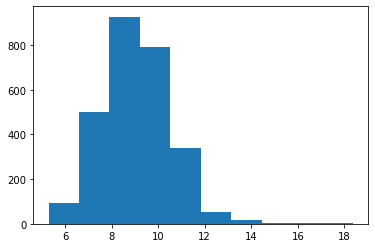

In [176]:
plt.hist(y_FD_pred_GB)

In [177]:
GB_DK_cv = GridSearchCV(base_GB_DK, param_grid, scoring = 'neg_mean_squared_error', n_jobs = 2, verbose = 3)
GB_DK_cv.fit(X_DK_train, y_DK_train)
print(f"Tuned Gradient Boost DK Best Estimator: {GB_DK_cv.best_estimator_}")
print(f"Tuned Gradient Boost DK Best Score: {GB_DK_cv.best_score_}")
print(f"Tuned Gradient Boost DK Best Params: {GB_DK_cv.best_params_}")

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:  1.7min
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed: 14.2min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed: 35.1min
[Parallel(n_jobs=2)]: Done 300 out of 300 | elapsed: 39.7min finished


Tuned Gradient Boost DK Best Estimator: GradientBoostingRegressor(learning_rate=0.01, n_estimators=200)
Tuned Gradient Boost DK Best Score: -46.55980830900665
Tuned Gradient Boost DK Best Params: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}


In [178]:
best_GB_DK = GradientBoostingRegressor(max_depth = 3, n_estimators = 200, learning_rate = 0.01, random_state = 42)
best_GB_DK.fit(X_DK_train, y_DK_train)
y_DK_pred_GB = best_GB_DK.predict(X_DK_test)
print(f"Best_GB_DK Train R-squared: {best_GB_DK.score(X_DK_train, y_DK_train)}")
print(f"Best_GB_DK Test R-squared: {best_GB_DK.score(X_DK_test, y_DK_test)}")
print(f"Best_GB_DK MAE: {mean_absolute_error(y_DK_test, y_DK_pred_GB)}")
print(f"Best_GB_DK RMSE: {mean_squared_error(y_DK_test, y_DK_pred_GB, squared = False)}")
print(f"Best_GB_DK MSE: {mean_squared_error(y_DK_test, y_DK_pred_GB)}")

Best_GB_DK Train R-squared: 0.06006407512198053
Best_GB_DK Test R-squared: 0.021753108323177672
Best_GB_DK MAE: 5.297777299552158
Best_GB_DK RMSE: 6.782288989593845
Best_GB_DK MSE: 45.99944393836591


In [186]:
y_DK_pred_GB.min(), y_DK_pred_GB.max()

(4.745269168877184, 13.126587206045281)

(array([173., 675., 938., 621., 270.,  37.,   9.,   4.,   3.,   1.]),
 array([ 4.74526917,  5.58340097,  6.42153278,  7.25966458,  8.09779638,
         8.93592819,  9.77405999, 10.61219179, 11.4503236 , 12.2884554 ,
        13.12658721]),
 <BarContainer object of 10 artists>)

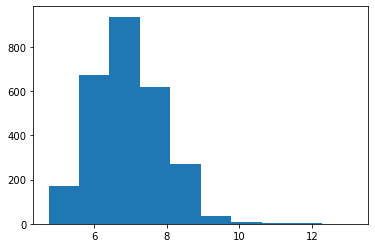

In [187]:
plt.hist(y_DK_pred_GB)

In [183]:
param_grid = {'n_estimators': [100, 200, 300, 400, 500], 'max_depth': [3, 5, 7, 9],\
              'learning_rate' : [0.001, 0.01, 0.05, 0.1], 'alpha': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}

In [180]:
from sklearn.model_selection import RandomizedSearchCV

In [184]:
XGB_FD_cv = RandomizedSearchCV(base_XGB_FD, param_grid, n_iter = 90, scoring = 'neg_mean_squared_error', cv = 4, n_jobs = 2, verbose = 3)
XGB_FD_cv.fit(X_FD_train, y_FD_train)
print(f"Tuned XG Boost FD Best Estimator: {XGB_FD_cv.best_estimator_}")
print(f"Tuned XG Boost FD Best Score: {XGB_FD_cv.best_score_}")
print(f"Tuned XG Boost FD Best Params: {XGB_FD_cv.best_params_}")

Fitting 4 folds for each of 90 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   36.7s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  2.9min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  7.1min
[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed:  9.0min finished


Tuned XG Boost FD Best Estimator: XGBRegressor(alpha=0, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=400, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Tuned XG Boost FD Best Score: -84.20785411903051
Tuned XG Boost FD Best Params: {'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.01, 'alpha': 0}


In [182]:
best_XGB_FD = XGBRegressor(n_estimators = 400, learning_rate = 0.01, max_depth = 3, alpha = 0, random_state = 42)
best_XGB_FD.fit(X_FD_train, y_FD_train)
y_FD_pred_XGB = best_XGB_FD.predict(X_FD_test)
print(f"Best_XGB_FD Train R-squared: {best_XGB_FD.score(X_FD_train, y_FD_train)}")
print(f"Best_XGB_FD Test R-squared: {best_XGB_FD.score(X_FD_test, y_FD_test)}")
print(f"Best_XGB_FD MAE: {mean_absolute_error(y_FD_test, y_FD_pred_XGB)}")
print(f"Best_XGB_FD RMSE: {mean_squared_error(y_FD_test, y_FD_pred_XGB, squared = False)}")
print(f"Best_XGB_FD MSE: {mean_squared_error(y_FD_test, y_FD_pred_XGB)}")

Best_XGB_FD Train R-squared: 0.0848889168342678
Best_XGB_FD Test R-squared: 0.02321503540124492
Best_XGB_FD MAE: 7.059264624472374
Best_XGB_FD RMSE: 9.162428588515045
Best_XGB_FD MSE: 83.9500976396378


In [185]:
y_FD_pred_XGB.min(), y_FD_pred_XGB.max()

(4.4890666, 18.62411)

(array([ 43., 357., 900., 882., 437.,  86.,  18.,   3.,   2.,   3.]),
 array([ 4.4890666,  5.9025707,  7.3160753,  8.729579 , 10.143084 ,
        11.556588 , 12.970092 , 14.383596 , 15.797101 , 17.210606 ,
        18.62411  ], dtype=float32),
 <BarContainer object of 10 artists>)

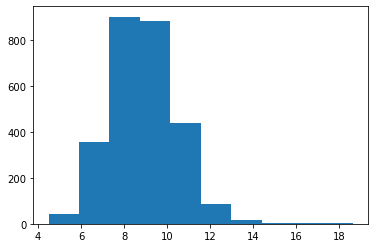

In [188]:
plt.hist(y_FD_pred_XGB)

In [189]:
XGB_DK_cv = RandomizedSearchCV(base_XGB_DK, param_grid, n_iter = 90, scoring = 'neg_mean_squared_error', cv = 4, n_jobs = 2, verbose = 3)
XGB_DK_cv.fit(X_DK_train, y_DK_train)
print(f"Tuned XG Boost DK Best Estimator: {XGB_DK_cv.best_estimator_}")
print(f"Tuned XG Boost DK Best Score: {XGB_DK_cv.best_score_}")
print(f"Tuned XG Boost DK Best Params: {XGB_DK_cv.best_params_}")

Fitting 4 folds for each of 90 candidates, totalling 360 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:   39.1s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:  3.6min
[Parallel(n_jobs=2)]: Done 284 tasks      | elapsed:  8.4min
[Parallel(n_jobs=2)]: Done 360 out of 360 | elapsed: 10.7min finished


Tuned XG Boost DK Best Estimator: XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
Tuned XG Boost DK Best Score: -46.50976884403717
Tuned XG Boost DK Best Params: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.01, 'alpha': 10}


In [190]:
best_XGB_DK = XGBRegressor(n_estimators = 500, learning_rate = 0.01, max_depth = 3, alpha = 10, random_state = 45)
best_XGB_DK.fit(X_DK_train, y_DK_train)
y_DK_pred_XGB = best_XGB_DK.predict(X_DK_test)
print(f"Best_XGB_DK Train R-squared: {best_XGB_DK.score(X_DK_train, y_DK_train)}")
print(f"Best_XGB_DK Test R-squared: {best_XGB_DK.score(X_DK_test, y_DK_test)}")
print(f"Best_XGB_DK MAE: {mean_absolute_error(y_DK_test, y_DK_pred_XGB)}")
print(f"Best_XGB_DK RMSE: {mean_squared_error(y_DK_test, y_DK_pred_XGB, squared = False)}")
print(f"Best_XGB_DK MSE: {mean_squared_error(y_DK_test, y_DK_pred_XGB)}")

Best_XGB_DK Train R-squared: 0.09388864815411357
Best_XGB_DK Test R-squared: 0.0218435310307753
Best_XGB_DK MAE: 5.283155616846158
Best_XGB_DK RMSE: 6.781975527260486
Best_XGB_DK MSE: 45.995192052360146


In [192]:
y_DK_pred_XGB.min(), y_DK_pred_XGB.max()

(3.6629987, 13.905422)

(array([ 62., 340., 900., 837., 447., 108.,  21.,  11.,   2.,   3.]),
 array([ 3.6629987,  4.687241 ,  5.7114835,  6.735726 ,  7.7599683,
         8.78421  ,  9.808453 , 10.832695 , 11.856937 , 12.88118  ,
        13.905422 ], dtype=float32),
 <BarContainer object of 10 artists>)

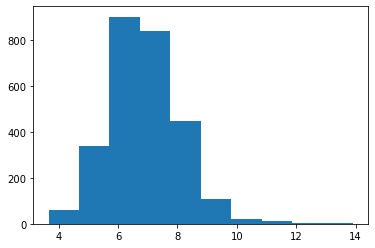

In [193]:
plt.hist(y_DK_pred_XGB)

In [ ]:
#Gradient Boost for FD, XGBoost for DK